In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
model_df=pd.read_csv('./home_credit_data/model_df.csv')

In [5]:
X=model_df[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','bureau_DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Closed_count_norm','CREDIT_ACTIVE_Active_count_norm','DAYS_BIRTH','DAYS_BIRTH_GROUP','bureau_DAYS_CREDIT_min','bureau_DAYS_CREDIT_UPDATE_mean','DAYS_EMPLOYED','CREDIT_ACTIVE_Active_count','OWN_CAR_AGE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','BASEMENTAREA_MEDI','LIVINGAREA_AVG','bureau_DAYS_ENDDATE_FACT_min','bureau_DAYS_ENDDATE_FACT_sum','BASEMENTAREA_AVG','bureau_DAYS_CREDIT_ENDDATE_sum','LIVINGAREA_MEDI','BASEMENTAREA_MODE','bureau_DAYS_CREDIT_max','TOTALAREA_MODE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','LIVINGAREA_MODE','bureau_DAYS_CREDIT_sum','APARTMENTS_AVG','bureau_DAYS_CREDIT_UPDATE_sum','APARTMENTS_MODE','bureau_DAYS_ENDDATE_FACT_mean','APARTMENTS_MEDI','CREDIT_TYPE_Microloan_count_norm','bureau_DAYS_CREDIT_ENDDATE_mean','REG_CITY_NOT_WORK_CITY','bureau_DAYS_CREDIT_UPDATE_min','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','bureau_DAYS_CREDIT_ENDDATE_min','FLOORSMAX_AVG','CREDIT_TYPE_Credit card_count_norm','AMT_CREDIT','FLOORSMAX_MEDI','CREDIT_TYPE_Credit card_count','ELEVATORS_AVG','FLOORSMAX_MODE']]
y = model_df.TARGET

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [6]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [7]:
from sklearn.metrics import accuracy_score
y_predict_rf = random_forest.predict(X_test)
print("Random forest accuracy score: {:.2f}".format(accuracy_score(y_test, y_predict_rf)))

Random forest accuracy score: 0.97


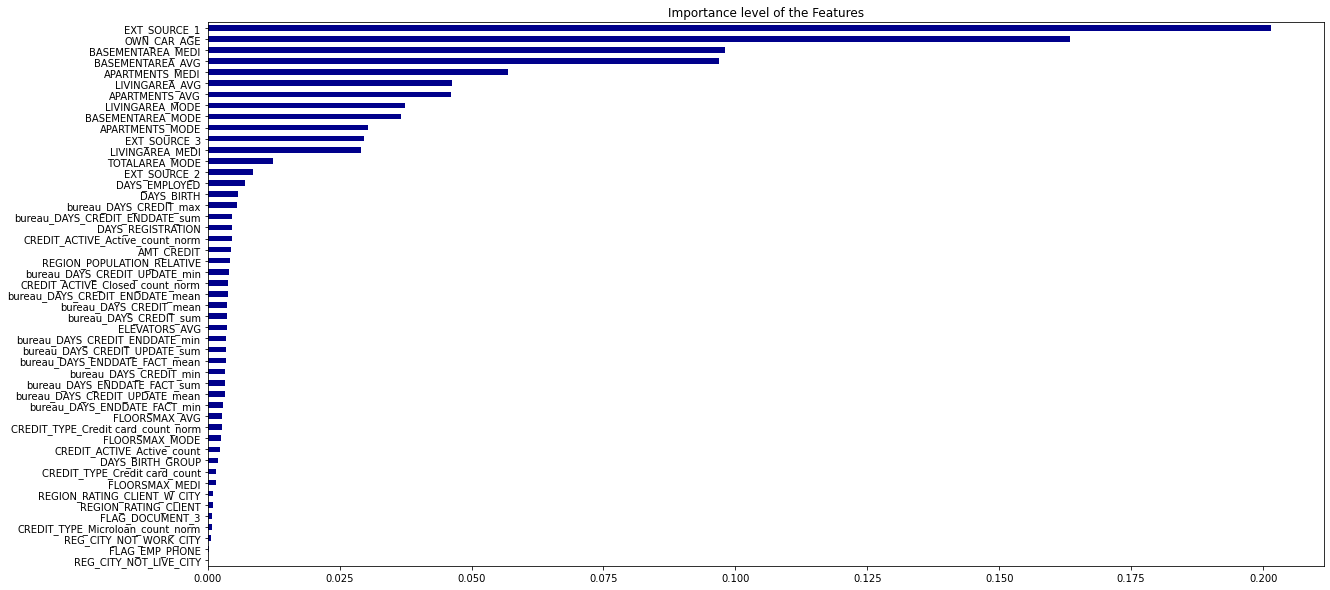

In [8]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance level of the Features')
plt.show()

## GridSearch - RandomizedSearch

In [21]:
random_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=random_forest, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [23]:
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=25,
                                                    random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 110}

In [25]:
rf_random.best_score_

-0.031200240599944817

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [17]:
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [18]:
grid_search.fit(X,y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=25, random_state=2),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [19]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [26]:
grid_search.best_score_

0.9687997594000551